# Simple avantgarde model


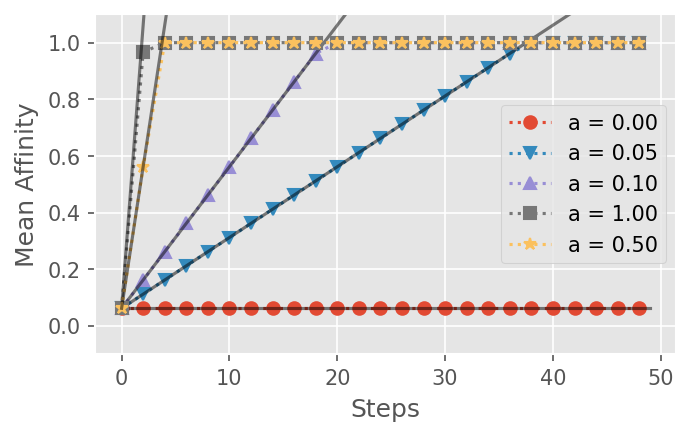

In [1]:
# import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi']= 150

def load_data(avantgarde_factor):
    fname = f"../data/data_metric-chebyshev_avantgarde-{avantgarde_factor:.2f}_tau-2.00.csv"
    columns = ['id', 'affinity', 'step']
    data = pd.read_csv(fname, usecols=columns)
    return data

# begin main
# -----------------------------------------------------------------
# load data
data_dict = {}
a_array = [0.00, 0.05, 0.1, 1.0, 0.5]
for a in a_array:
    data_dict[a] = load_data(a)

#fname = "../data/avantgarde/avantgarde_ensemble_2022-03-30T11-28-09.csv"


affinity = lambda data, step: np.array(data[data['step'] == step]['affinity'])
#state = lambda step: np.array(data[data['step'] == step]['state'])
#density = lambda step: np.sum(state(step)) * 1. / state(step).size

# Plot mean affinity
nSteps, tau = 50, 0.5
fig = plt.figure(figsize=(5,3))
x = np.arange(0, nSteps, 1)
markers = ('o', 'v', '^', 's', '*')
for marker, (a_, data_) in zip(markers, data_dict.items()):
    mean_affinity = [affinity(data_, step).mean() for step in range(0,nSteps,2)]
    plt.plot(range(0, nSteps, 2), mean_affinity, ':', marker=marker, ms=6, label=f'a = {a_:.2f}')
    offset = affinity(data_, 0).mean()
    plt.plot(x, offset + x*a_*tau, color='black', alpha=0.5)

plt.xlabel('Steps')
plt.ylabel('Mean Affinity')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()
# -----------------------------------------------------------------
# end

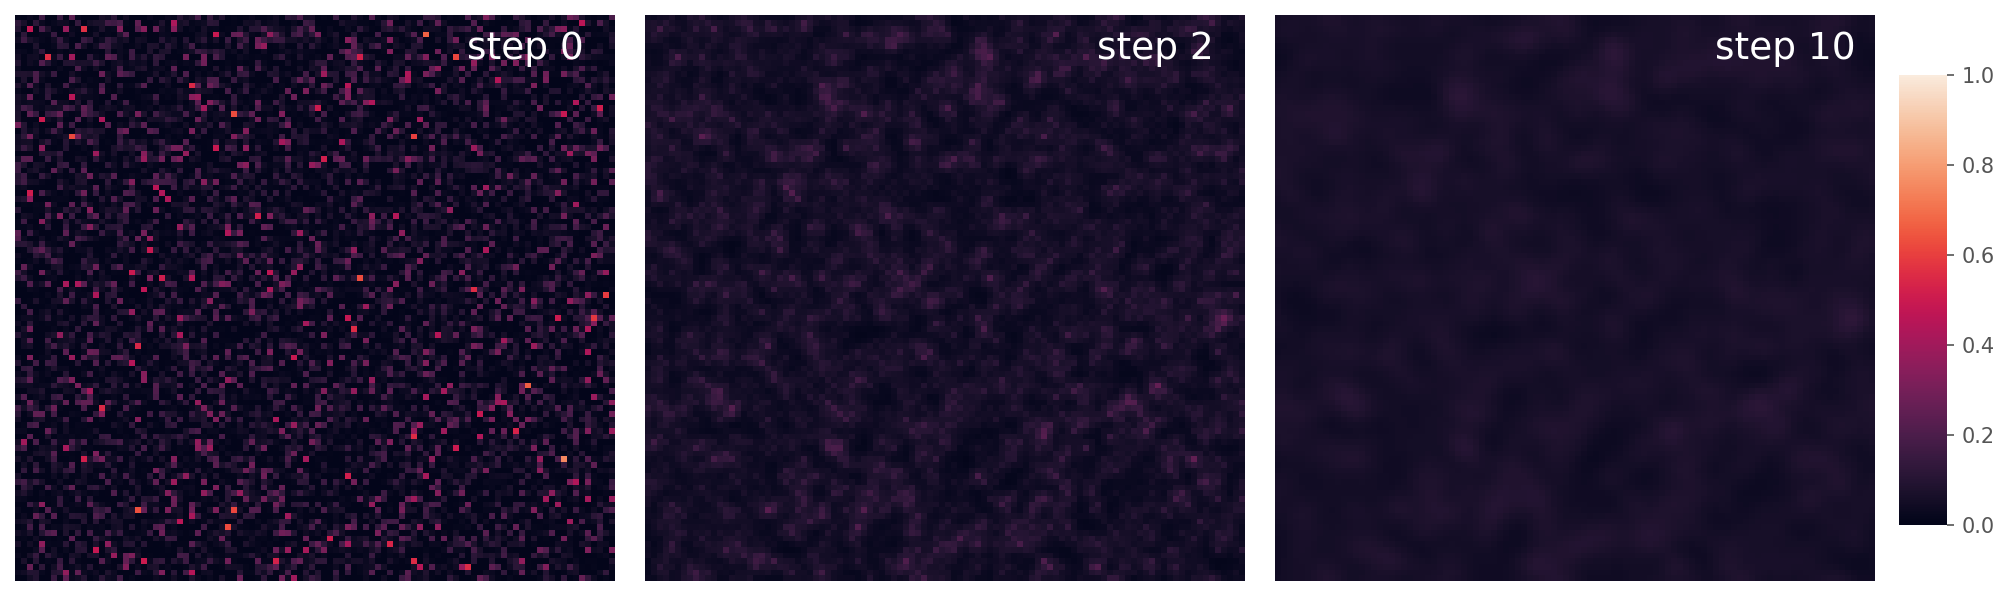

In [2]:
# snapshots
# ------------------------------------------------------------------
data = data_dict[0.00]
grid = lambda data, step: affinity(data, step).reshape(100, 100)

import seaborn as sns
#fig, ax = plt.subplots()
#plt.imshow(grid(data, 10))

# fig, axes = plt.subplots(2, 3, figsize=(16,10), sharex=True, sharey=True)
fig, axes = plt.subplots(1, 3, figsize=(16,5), sharex=True, sharey=True)

steps = (0, 2, 10)
#sns.set(font_scale=)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(data, step), vmin=0., vmax=1., cbar=i==0, cbar_ax=cbar_ax)
    cl = 'black' if affinity(data, step).mean() > 0.5 else 'white' 
    ax.set_title(f"step {step}", x=0.85, y=0.9, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

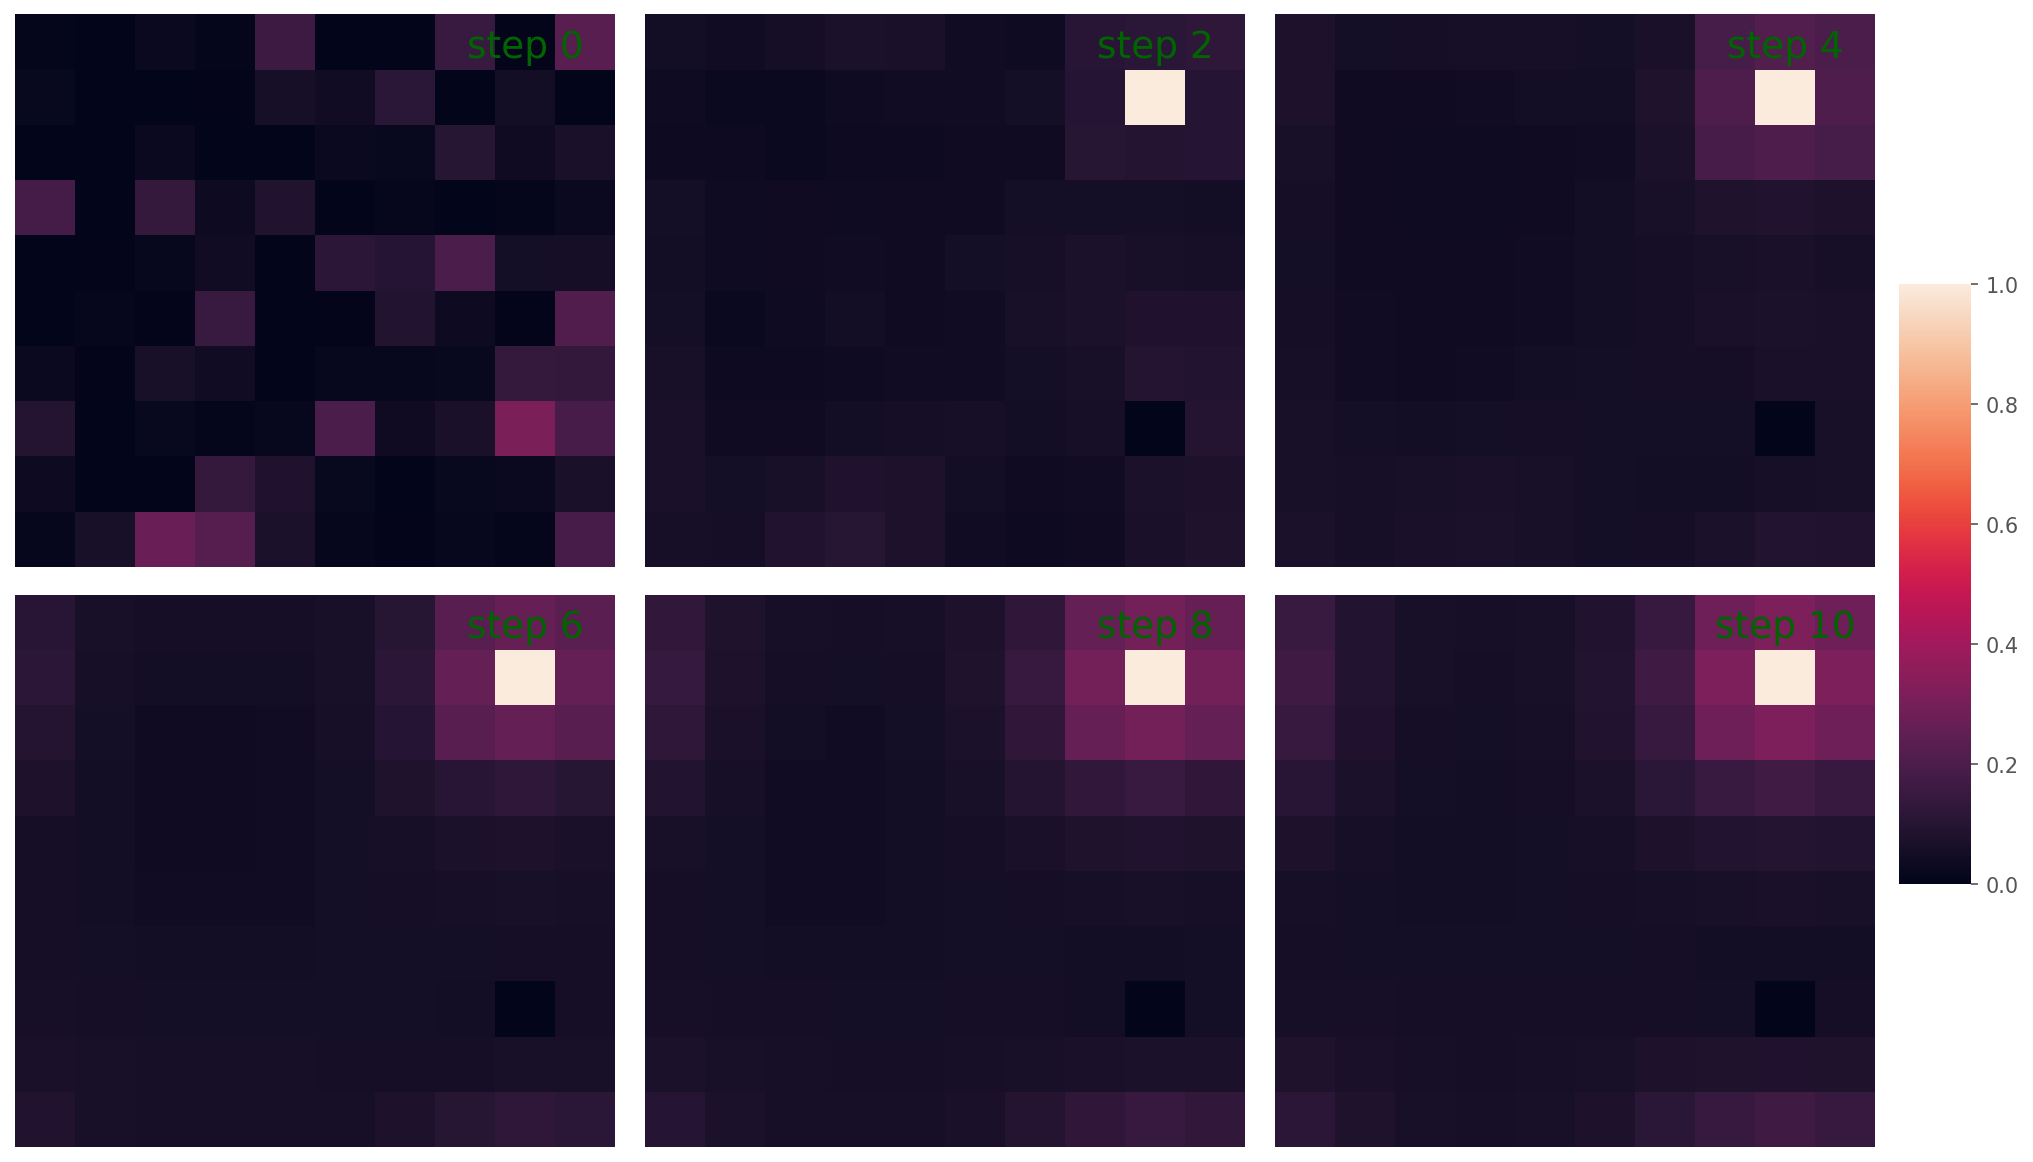

In [4]:
def load_data2():
    fname = f"../data/data_test.csv"
    columns = ['id', 'affinity', 'step']
    data = pd.read_csv(fname, usecols=columns)
    return data

dtest = load_data2()

grid = lambda data, step: affinity(data, step).reshape(10, 10)

import seaborn as sns
#fig, ax = plt.subplots()
#plt.imshow(grid(data, 10))

fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)

#sns.set(font_scale=)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
for i, ax in enumerate(axes.flatten()):
    step = i * 2
    sns.heatmap(ax=ax, data=grid(dtest, step), vmin=0., vmax=1., cbar=i==0, cbar_ax=cbar_ax)
    cl = "darkgreen"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.85, y=0.9, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

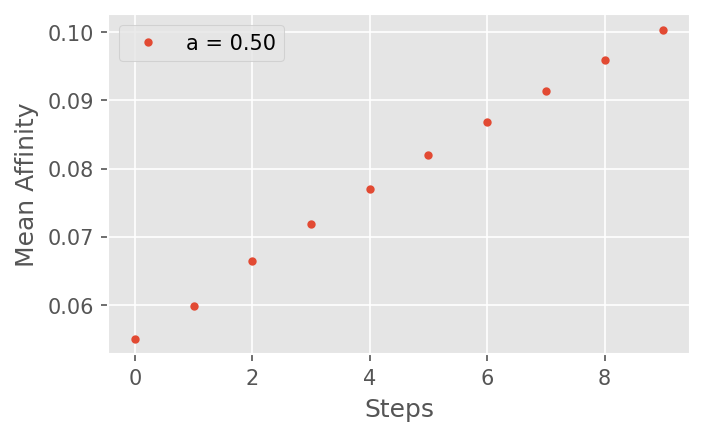

In [11]:
# Plot mean affinity
nSteps, tau = 10, 0.5
fig = plt.figure(figsize=(5,3))
x = np.arange(0, nSteps, 1)
markers = ('o', 'v', '^', 's', '*')
#for marker, (a_, data_) in zip(markers, (0.1, dtest)):
mean_affinity = [affinity(dtest, step).mean() for step in range(0,nSteps,1)]
plt.plot(range(0, nSteps, 1), mean_affinity, 'o', ms=3, label=f'a = {a_:.2f}')
offset = affinity(dtest, 0).mean()
#plt.plot(x, offset + x*a_*tau, color='black', alpha=0.5)

plt.xlabel('Steps')
plt.ylabel('Mean Affinity')
#plt.ylim(0.86, 0.87)
plt.legend()
plt.grid(True)
plt.show()

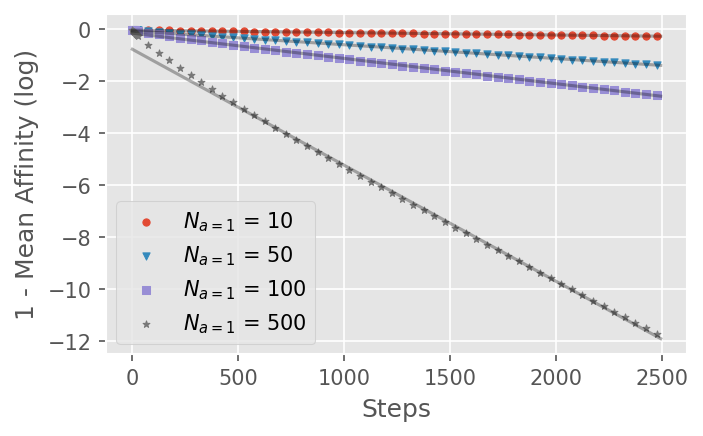

In [12]:
# plot affinity Nk dependence
def load_data(fname):
    columns = ['id', 'affinity', 'step']
    data = pd.read_csv(fname, usecols=columns)
    return data

data_dict = {}
nk_array = (10, 50, 100, 500)
for nk in nk_array:
    fname = f"../data/data_metric=chebyshev_avantgarde=n={nk}_tau=2.00_step=25.csv"
    data_dict[nk] = load_data(fname)

# Plot mean affinity
nSteps = 2500
first_indices = np.arange(0, 25, 3)
larger_indices = np.arange(25, nSteps, 50)

fig = plt.figure(figsize=(5,3))

import scipy

markers = ('o', 'v', 's', '*')
for marker, (nk_, data_) in zip(markers, data_dict.items()):
    indices = np.concatenate((first_indices, larger_indices))
    mean_affinity = np.array([affinity(data_, step).mean() for step in indices])
    plt.scatter(indices, np.log10(1-mean_affinity), marker=marker, s=12, label=r'$N_{a=1}$ ='+f' {nk_}')


# offset = affinity(data, 0).mean()
    fitfun = lambda x, p1, p2: p1 + x * p2
    x = np.arange(0, nSteps, 5)
    start = 15
    p, errp = scipy.optimize.curve_fit(fitfun, indices[start:], np.log10(1-mean_affinity[start:]))
    plt.plot(x, p[0] + x * p[1], color='black', alpha=0.3)#, label=f"1-exp(-(x-x0)/m)\n x0={p[0]:.2f}, m={p[1]:.2f}")

#plt.gca().set_yscale('log')
plt.xlabel('Steps')
plt.ylabel('1 - Mean Affinity (log)')
#plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

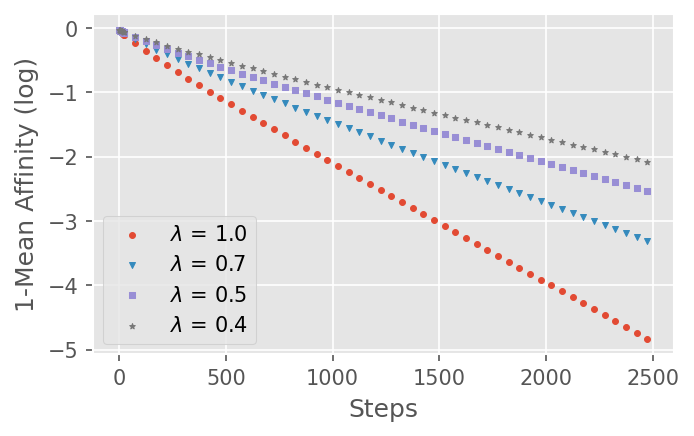

In [13]:
# plot affinity Nk dependence
def load_data(fname):
    columns = ['id', 'affinity', 'step']
    data = pd.read_csv(fname, usecols=columns)
    return data

data_dict = {}
tau_array = (1., 1.5, 2.0, 2.5)
for tau in tau_array:
    fname = f"../data/data_metric=chebyshev_avantgarde=n=100_tau={tau:.2f}_step=25.csv"
    data_dict[tau] = load_data(fname)

# Plot mean affinity
nSteps = 2500
first_indices = np.arange(0, 25, 3)
larger_indices = np.arange(25, nSteps, 50)

fig = plt.figure(figsize=(5,3))

markers = ('o', 'v', 's', '*')
for marker, (tau_, data_) in zip(markers, data_dict.items()):
    indices = np.concatenate((first_indices, larger_indices))
    mean_affinity = np.array([affinity(data_, step).mean() for step in indices])
    plt.scatter(indices, np.log10(1-mean_affinity), marker=marker, s=8, label=fr'$\lambda$ = {1./tau_:.1f}')

import scipy
# offset = affinity(data, 0).mean()
# fitfun = lambda x, p1, p2: 1 - np.exp(-(x-p1)/p2)

# p, errp = scipy.optimize.curve_fit(fitfun, indices, mean_affinity)
# plt.plot(x, 1-np.exp(-(x-p[0])/p[1]), color='black', alpha=0.5, label=f"1-exp(-(x-x0)/m)\n x0={p[0]:.2f}, m={p[1]:.2f}")

plt.xlabel('Steps')
plt.ylabel('1-Mean Affinity (log)')
#plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

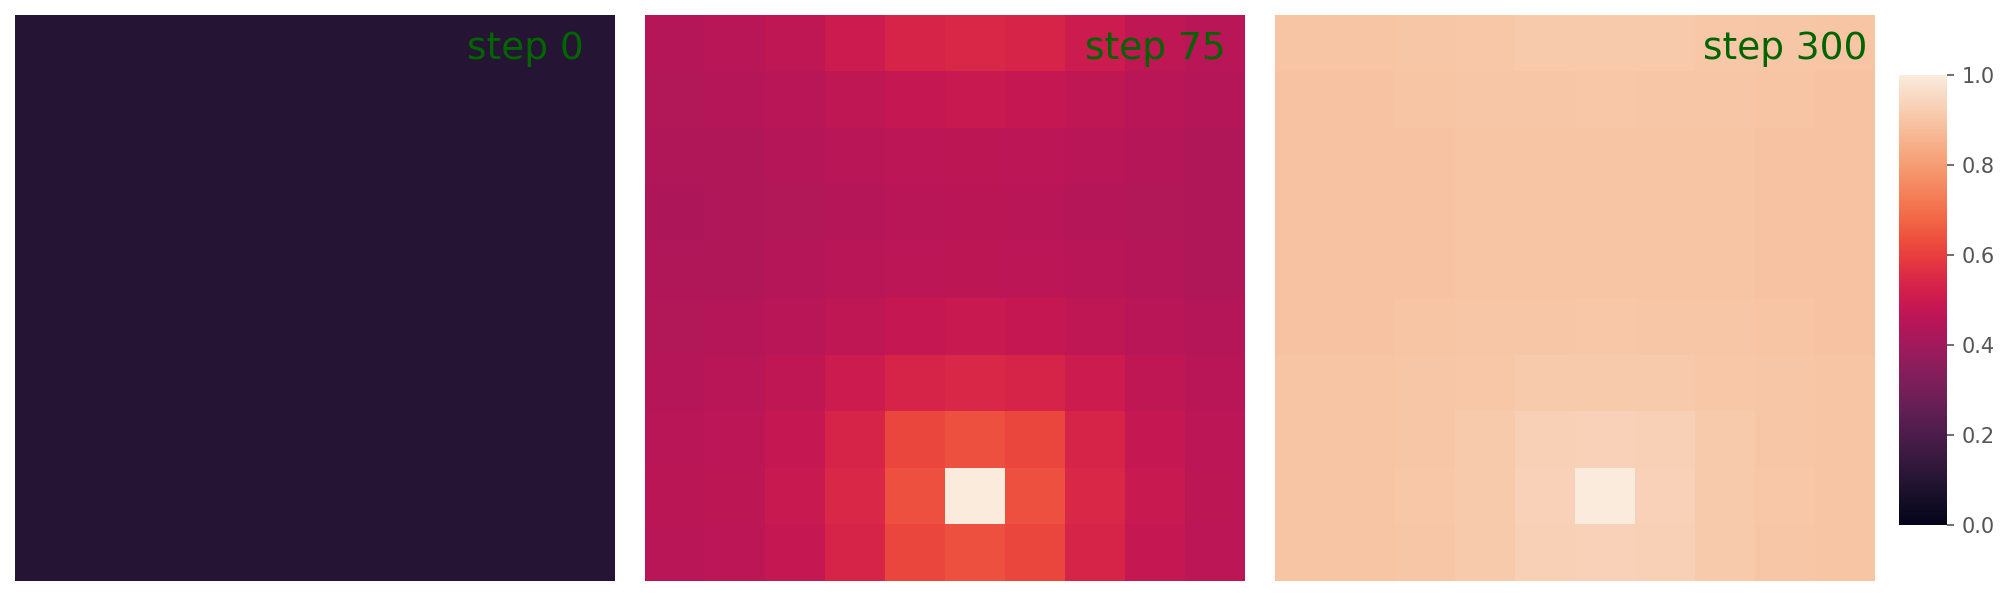

In [14]:
grid = lambda data, step: affinity(data, step).reshape(10, 10)

import seaborn as sns
#fig, ax = plt.subplots()
#plt.imshow(grid(data, 10))

fname = "../data/data_metric=chebyshev_avantgarde=single_A0=const_tau=1.00_step=25_n=100.csv"
dtest = load_data(fname)

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

#sns.set(font_scale=)
steps = (0, 75, 300)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(dtest, step).transpose(), vmin=0., vmax=1., cbar=i==0, cbar_ax=cbar_ax)
    cl = "darkgreen"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.85, y=0.9, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

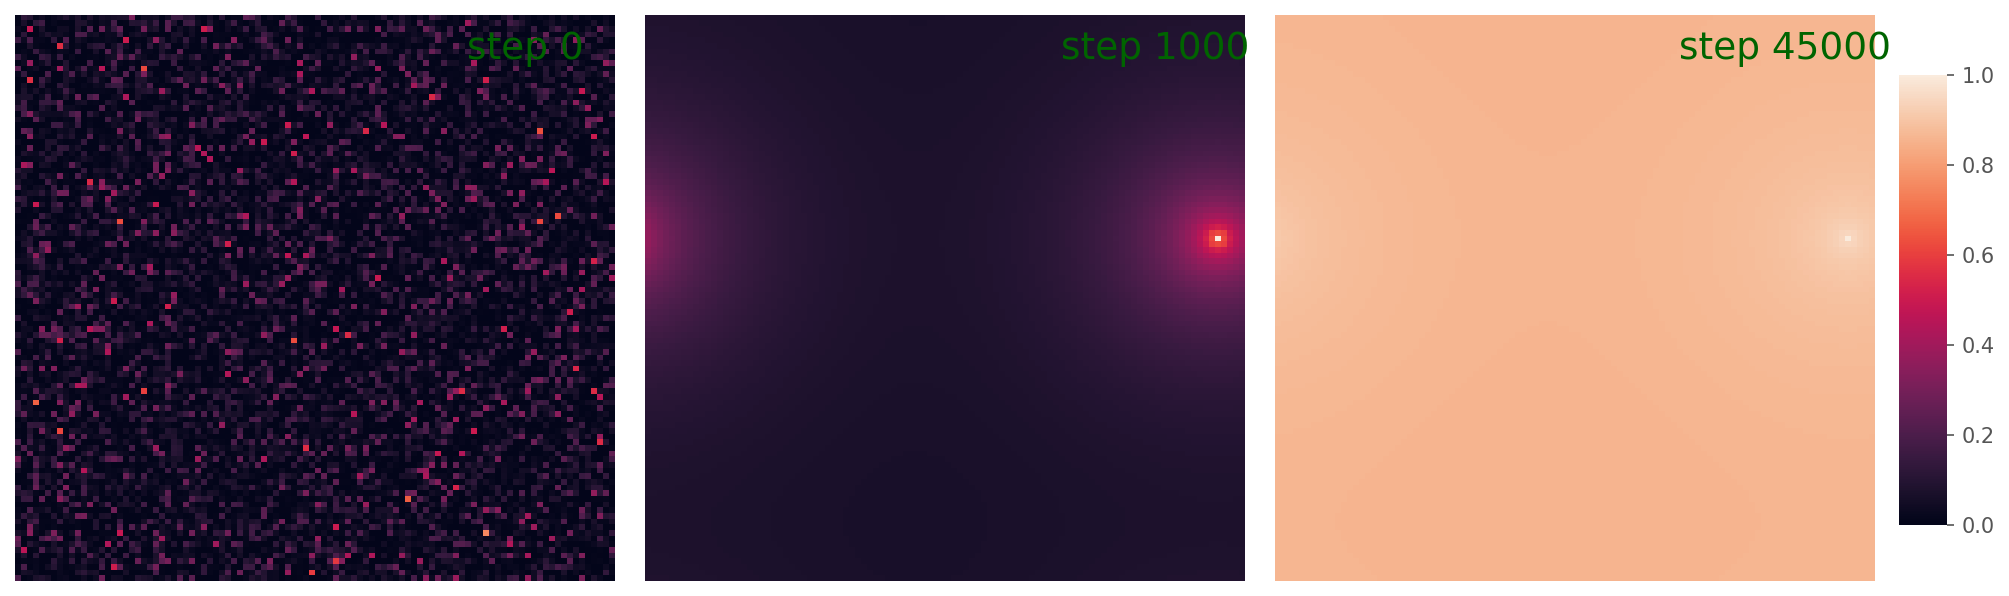

In [15]:
grid = lambda data, step: affinity(data, step).reshape(100, 100)

import seaborn as sns
#fig, ax = plt.subplots()
#plt.imshow(grid(data, 10))

fname = "../data/data_metric=chebyshev_avantgarde=single_tau=1.00_step=1000.csv"
dtest = load_data(fname)

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

#sns.set(font_scale=)
steps = (0, 1000, 45000)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(dtest, step).transpose(), vmin=0., vmax=1., cbar=i==0, cbar_ax=cbar_ax)
    cl = "darkgreen"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.85, y=0.9, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [16]:
# plot affinity Nk dependence
def load_data(fname):
    columns = ['id','avantgarde', 'affinity', 'step']
    data = pd.read_csv(fname, usecols=columns)
    return data

In [17]:
import seaborn as sns
#fig, ax = plt.subplots()
#plt.imshow(grid(data, 10))

fname = "../data/data_po_N-10k_Np-50_No-50_tau-2.0_step-50.csv"
fname_6040 = "../data/data_po_N-10k_Np-60_No-40_tau-2.0_step-50.csv"
fname_4060 = "../data/data_po_N-10k_Np-40_No-60_tau-2.0_step-50.csv"
fname_1 = "../data/data_po_N-10k_Np-50_No-50_tau-2.0_step-50_bounded.csv"
fname_60401 = "../data/data_po_N-10k_Np-60_No-40_tau-2.0_step-50_bounded.csv"
fname_40601 = "../data/data_po_N-10k_Np-40_No-60_tau-2.0_step-50_bounded.csv"
data_dict = {
    5050: load_data(fname),
    6040: load_data(fname_6040),
    4060: load_data(fname_4060),
    50501: load_data(fname_1),
    60401: load_data(fname_60401),
    40601: load_data(fname_40601)
}

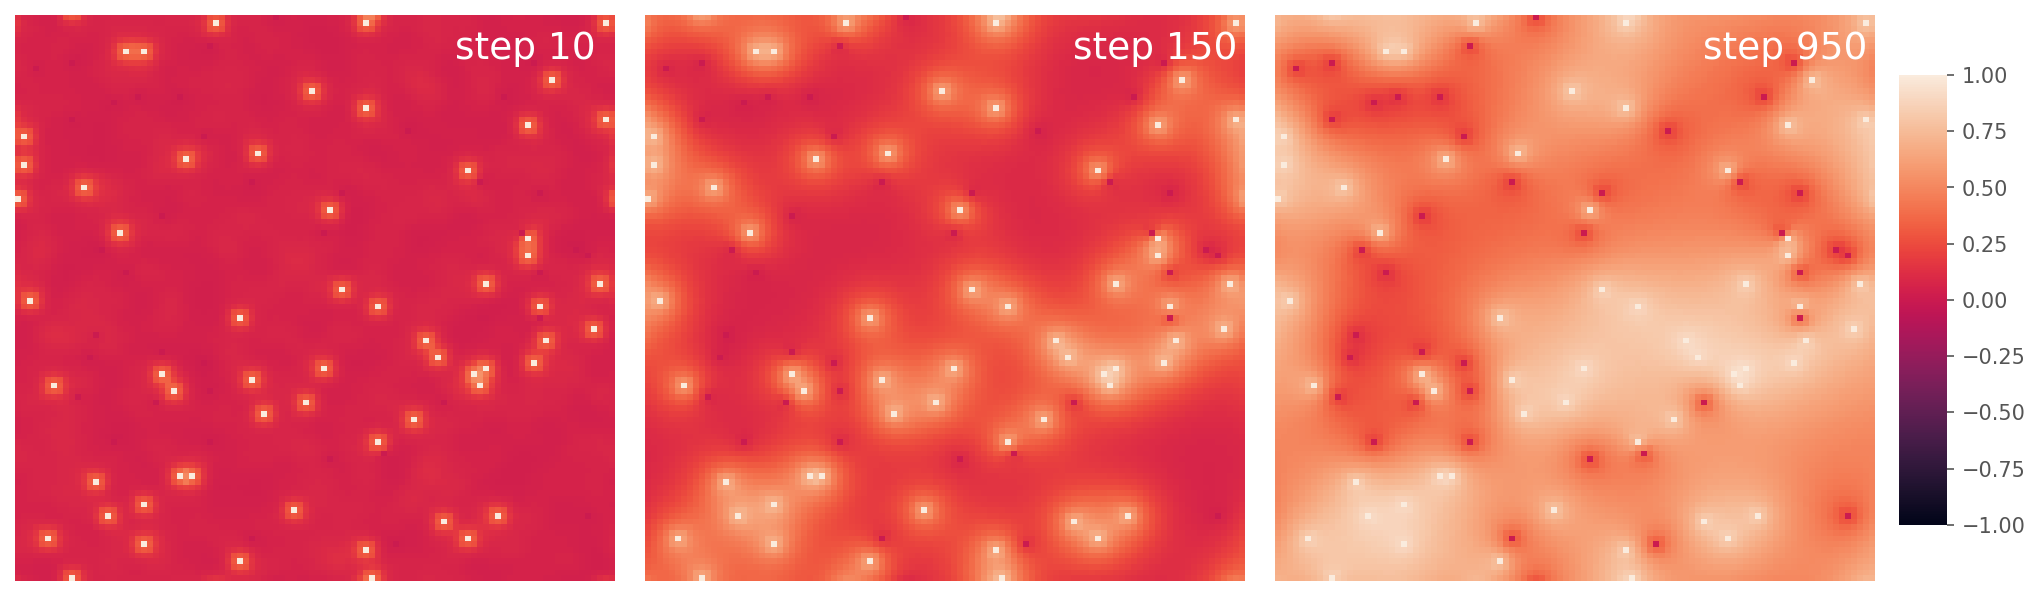

In [18]:
grid = lambda data, step: affinity(data, step).reshape(100, 100)
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

#sns.set(font_scale=)
dtest = data_dict[60401]
steps = (10, 150, 950)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(dtest, step).transpose(), vmin=-1., vmax=1., cbar=i==0, cbar_ax=cbar_ax)
    cl = "white"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.85, y=0.9, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

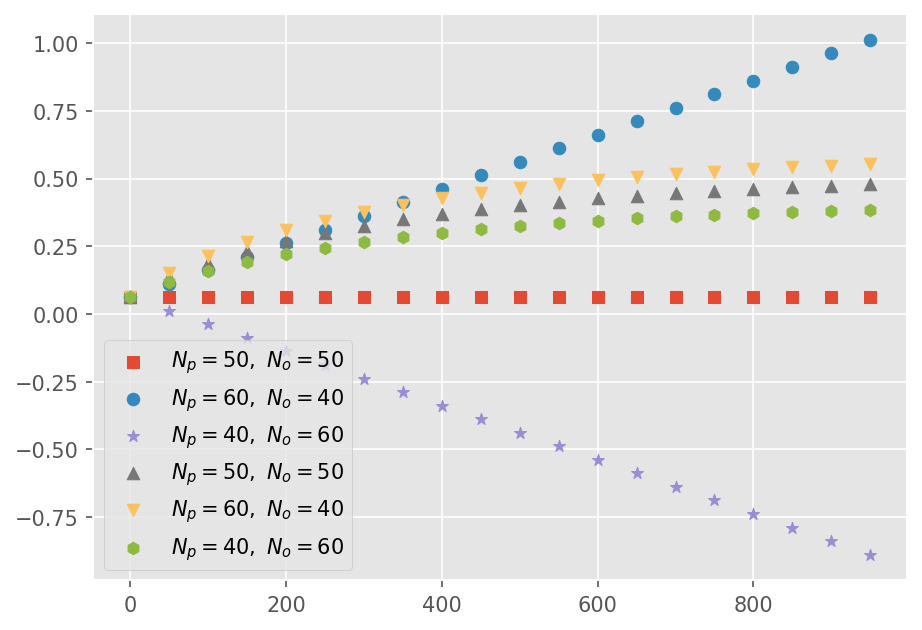

In [19]:
# plot global affinity
plt.figure(figsize=(7, 5))
steps = np.arange(0, 1000, 50)

markers = ('s', 'o', '*', '^', 'v', 'h')
for marker, (key, data) in zip(markers, data_dict.items()):
    mean_affinity = np.array([affinity(data, step).mean() for step in steps])
    stdev_affinity = np.array([affinity(data, step).std() for step in steps])
    Np = int(str(key)[:2])
    No = int(str(key)[2:4])
    plt.scatter(steps, mean_affinity, marker=marker, label=r'$N_p=%d , \ N_o=%d$' % (Np, No))
    #plt.plot(steps, stdev_affinity, label='stdev')
    
    # plot theory
    #tau = 2.0
    #sum_a = Np - No
    #N = 10000
    #offset = affinity(data, 0).mean()
    #plt.plot(steps, offset + steps * sum_a / (N * tau), color='black', alpha=0.5)
    
plt.legend()
plt.show()

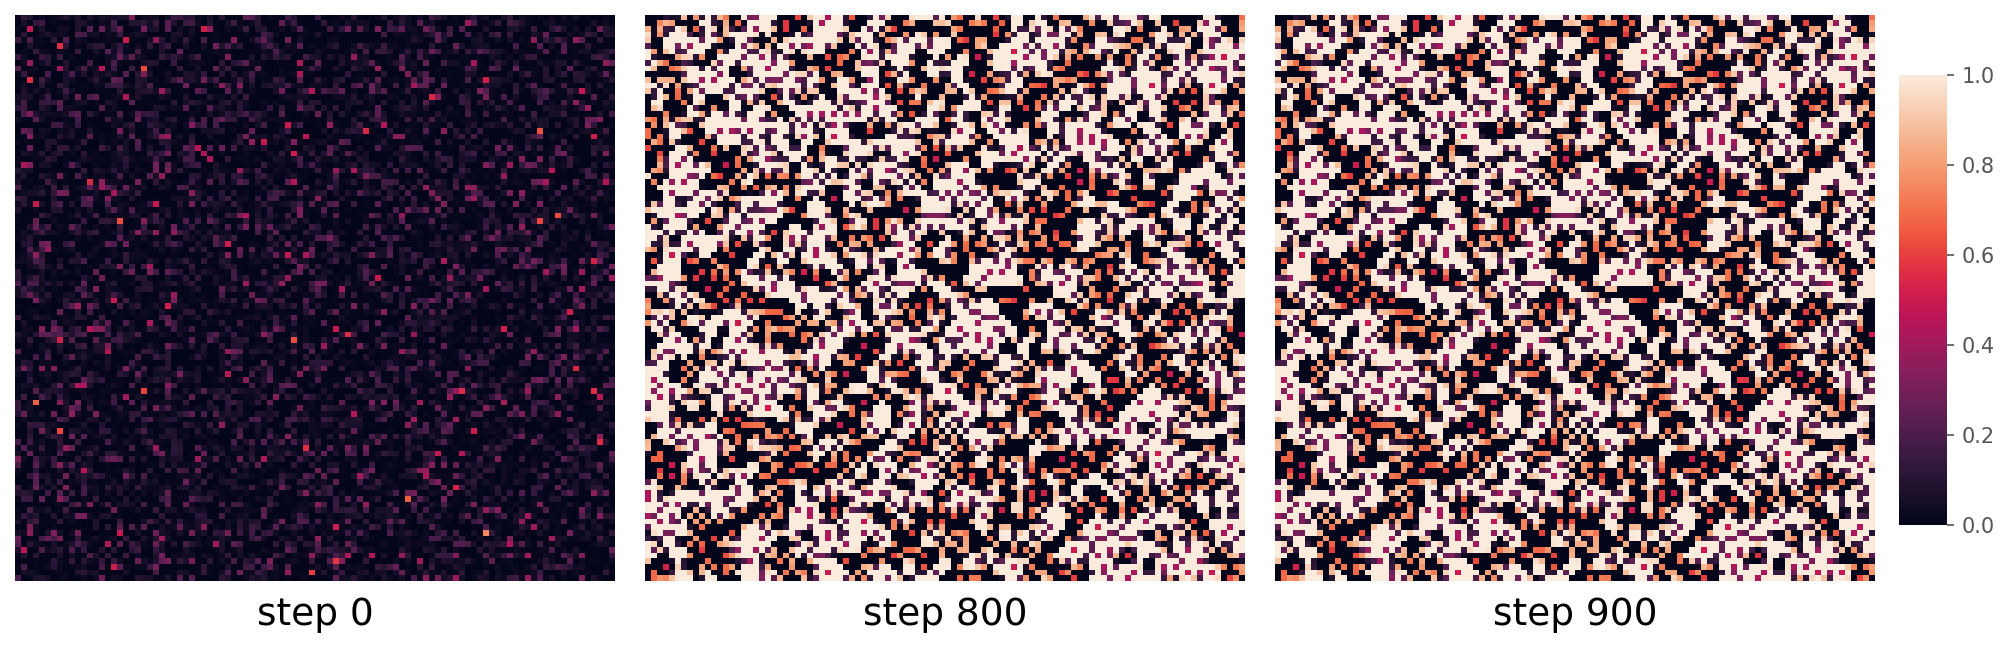

In [20]:
import seaborn as sns
#fig, ax = plt.subplots()
#plt.imshow(grid(data, 10))

fname = "../data/data_po_N-10k_Np-5k_No-5k_tau-2.0_step-50.csv"
dtest = load_data(fname)

avantgarde = lambda data, step: np.array(data[data["step"] == step]["avantgarde"])

grid = lambda data, step: affinity(data, step).reshape(100, 100)
gridAvant = lambda data, step: avantgarde(data, step).reshape(100, 100)
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

#sns.set(font_scale=)
#dtest = data_dict[6040]
steps = (0, 800, 900)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
ref = gridAvant(dtest, 100).transpose()*0.5 + 0.5
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(dtest, step).transpose(),  vmin=0, vmax=1., cbar=i==0, cbar_ax=cbar_ax)
    cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

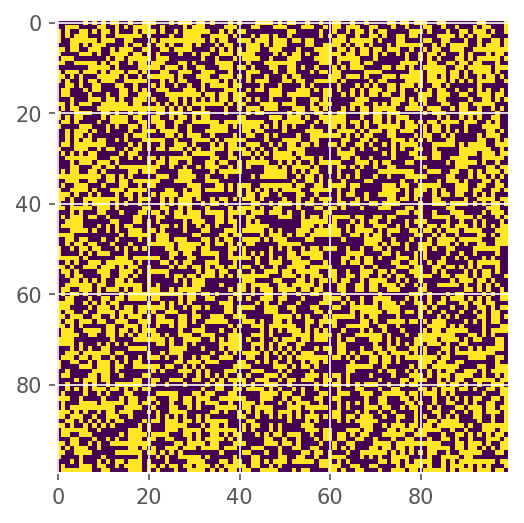

In [21]:
plt.imshow(gridAvant(dtest, 0).transpose())

In [22]:
def neighbours(data, idx):
    N = data["id"].max()
    Nx = int(np.sqrt(N))
    
    xh, xl = idx + 1, idx - 1
    yh, yl = (idx + Nx) % N, (idx - Nx) % N
    if (xh % Nx) == 1: xh -= Nx
    if (xl % Nx) == 0: xl += Nx
    c1, c2, c3, c4 = (xh+Nx) % N, (xh-Nx) % N, (xl+Nx) % N, (xl-Nx) % N
    nn_ids = (xh, xl, yh, yl, c1, c2, c3, c4)
    return data[data["id"].isin(nn_ids)]

In [23]:
def mean_affinity_neighbours(data, agentId, step):
    neighbourIds = neighbours(data, agentId)
    return affinity(neighbourIds, step).mean()

def GetPioneerIds(data):
    pioneers = data.query("avantgarde > 0")
    return pioneers.query("step == 0").get("id")

def corrected_pioneers_affinity(data, step):
    pioneers = data.query("avantgarde > 0")
    A = affinity(pioneers, step)
    meanANeighbours = []
    for i in GetPioneerIds(data):
        meanANeighbours.append(mean_affinity_neighbours(data, i, step))
    return A - meanANeighbours

def GetOpponentIds(data):
    opponents = data.query("avantgarde < 0")
    return opponents.query("step == 0").get("id")

def corrected_opponents_affinity(data, step):
    opponents = data.query("avantgarde < 0")
    A = affinity(opponents, step)
    meanANeighbours = []
    for i in GetOpponentIds(data):
        meanANeighbours.append(mean_affinity_neighbours(data, i, step))
    return A - meanANeighbours

def GetIds(data, query=None):
    if query:
        data = data.query(query)
    return data.query("step == 0").get("id")

def corrected_affinity(data, step, query):
    selected = data.query(query)
    A = affinity(selected, step)
    meanANeighbours = []
    for i in GetIds(selected):
        meanANeighbours.append(mean_affinity_neighbours(data, i, step))
    return A - meanANeighbours

In [24]:
"""
Pioneers inside opposing environment *** Affinity Plot

"""
f1 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f2 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.8_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f3 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.2_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f4 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.4-6.0.csv"
files = (f1, f2, f3, f4)
keys = ('$a_p=0.5$, $A_0 = B(0.6, 4.0)$', '$a_p=0.8$,  $A_0 = B(0.6, 4.0)$', '$a_p=0.2$,  $A_0 = B(0.6, 4.0)$', '$a_p=0.5$,  $A_0 = B(0.4, 6.0)$')
data_array = []
Mdata_array = []
for f in files:
    _data = load_data(f)
    t = _data.query("id == 1").get("step")[:25]
    # agent - mean neighbours
    mean_affinity = [corrected_pioneers_affinity(_data, ti).mean() for ti in t]
    std_affinity = [corrected_pioneers_affinity(_data, ti).std() for ti in t]    
    data_array.append((mean_affinity, std_affinity))
       
    M = np.array([[mean_affinity_neighbours(dtest, agentId, ti) for ti in t] \
                  for agentId in GetPioneerIds(dtest)])
    Mdiff = np.diff(M, axis=1)
    Mdata_array.append((Mdiff.mean(axis=0), Mdiff.std(axis=0)))

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_15444/2994352655.py:3: RuntimeWarning: Mean of empty slice.
  return affinity(neighbourIds, step).mean()
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FileNotFoundError: [Errno 2] No such file or directory: '../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.8_ao-0.5_bounded_init-beta-0.6-4.0.csv'

In [ ]:
plt.figure()
# plot
markers = ('o', 's', '^', '*')
for marker, key, (_mean_A, _std_A) in zip(markers, keys, data_array):
    plt.errorbar(t, _mean_A, yerr=_std_A, linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=4, label=f"{key}")
plt.legend()
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) - \bar{A}_{nn}(t) \rangle$')


fig = plt.figure()
ax = fig.gca()
for marker, key, (_meanM, _stdM) in zip(markers, keys, Mdata_array):
    plt.errorbar(t[:-1], _meanM, yerr=_stdM, linestyle="None", marker=marker, \
                 capsize=1.5, elinewidth=0.5, ms=4, label=f"{key}")
plt.legend()
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle \Delta M (t) \rangle$')
plt.show()

In [ ]:
"""
Pioneers inside opposing environment *** Affinity Plot

"""
f1 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f2 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.5_ao-0.2_bounded_init-beta-0.6-4.0.csv"
f3 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.5_ao-0.8_bounded_init-beta-0.6-4.0.csv"
f4 = "../data/data_po_N-1600_Np-x_No-40_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.4-6.0.csv"
files = (f1, f2, f3, f4)
keys = ('$a_o=0.5$, $A_0 = B(0.6, 4.0)$', '$a_o=0.8$,  $A_0 = B(0.6, 4.0)$', \
        '$a_o=0.2$,  $A_0 = B(0.6, 4.0)$', '$a_o=0.5$,  $A_0 = B(0.4, 6.0)$')
data_array = []
data_abs_array = []
Mdata_array = []
for f in files:
    _data = load_data(f)
    t = _data.query("id == 1").get("step")[:35]
    # agent - mean neighbours
    mean_affinity_abs = [affinity(_data, ti).mean() for ti in t]
    std_affinity_abs = [affinity(_data, ti).std() for ti in t]
    data_abs_array.append((mean_affinity_abs, std_affinity_abs))
    
    mean_affinity = [corrected_opponents_affinity(_data, ti).mean() for ti in t]
    std_affinity = [corrected_opponents_affinity(_data, ti).std() for ti in t]    
    data_array.append((mean_affinity, std_affinity))
       
    M = np.array([[mean_affinity_neighbours(dtest, agentId, ti) for ti in t] \
                  for agentId in GetOpponentIds(dtest)])
    Mdiff = np.diff(M, axis=1)
    Mdata_array.append((Mdiff.mean(axis=0), Mdiff.std(axis=0)))

In [ ]:
t = load_data(f1).query("id == 1").get("step")[:35]
data_abs_array = []
for f in files:
    _data = load_data(f).query("avantgarde < 0")
    # agent - mean neighbours
    mean_affinity_abs = [affinity(_data, ti).mean() for ti in t]
    std_affinity_abs = [affinity(_data, ti).std() for ti in t]
    data_abs_array.append((mean_affinity_abs, std_affinity_abs))

In [ ]:
plt.figure()
# plot
markers = ('o', 's', '^', '*')
for marker, key, (_mean_A, _std_A) in zip(markers, keys, data_array):
    plt.errorbar(t, _mean_A, yerr=_std_A, linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=4, label=f"{key}")
plt.legend()
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) - M(t) \rangle$')

plt.figure()
# plot
markers = ('o', 's', '^', '*')
for marker, key, (_mean_A, _std_A) in zip(markers, keys, data_abs_array):
    plt.errorbar(t, _mean_A, yerr=_std_A, linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=4, label=f"{key}")
plt.legend()
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) \rangle$')

fig = plt.figure()
ax = fig.gca()
for marker, key, (_meanM, _stdM) in zip(markers, keys, Mdata_array):
    plt.errorbar(t[:-1], _meanM, yerr=_stdM, linestyle="None", marker=marker, \
                 capsize=1.5, elinewidth=0.5, ms=4, label=f"{key}")
plt.legend()
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle \Delta M (t) \rangle$')
plt.show()

In [ ]:
f1 = "../data/data_po_N-1600_Np-15nn_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f2 = "../data/data_po_N-1600_Np-15nn1_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f3 = "../data/data_po_N-1600_Np-15nn2_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f4 = "../data/data_po_N-1600_Np-15nn4_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f5 = "../data/data_po_N-1600_Np-15nn6_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f6 = "../data/data_po_N-1600_Np-15nn4euclid_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f7 = "../data/data_po_N-1600_Np-15nn1s_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
f8 = "../data/data_po_N-1600_Np-15nn2euclid_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
files = (f2, f7, f3, f8, f4, f6, f5, f1)
data_array = []
data_abs_array = []
Mdata_array = []
for f in files:
    _data = load_data(f)
    t = _data.query("id == 1").get("step")
    # agent - mean neighbours
    mean_affinity_abs = [affinity(_data.query("avantgarde == 0.5"), ti).mean() for ti in t]
    std_affinity_abs = [affinity(_data.query("avantgarde == 0.5"), ti).std() for ti in t]
    data_abs_array.append((mean_affinity_abs, std_affinity_abs))
    
    mean_affinity, std_affinity = [], []
    for ti in t:
        corrA = corrected_affinity(_data, ti, "avantgarde == 0.5")
        mean_affinity.append(corrA.mean())
        std_affinity.append(corrA.std())
    data_array.append((mean_affinity, std_affinity))
       
    M = np.array([[mean_affinity_neighbours(_data, agentId, ti) for ti in t] \
                  for agentId in GetIds(_data, "avantgarde == 0.5")])
    Mdiff = np.diff(M, axis=1)
    Mdata_array.append((Mdiff.mean(axis=0), Mdiff.std(axis=0)))

In [ ]:
keys = ('#(NN is pioneer)$=1$', '#(NN(euclidean) is pioneer)$=1$', '#(NN is pioneer)$=2$', \
        '#(NN(euclidean) is pioneer)$=2$', \
       '#(NN is pioneer)$=4$', '#(NN(euclidean) is pioneer)$=4$', '#(NN is pioneer)$=6$', \
        '#(NN is pioneer)$=8$')
plt.figure()
# plot
markers = ('o', 's', '^', '*', 'h', '<', '>')
for marker, key, (_mean_A, _std_A) in zip(markers, keys, data_array):
    plt.errorbar(t, _mean_A, yerr=_std_A, linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=4, label=f"{key}")
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) - M(t) \rangle$')

plt.figure()
# plot
for marker, key, (_mean_A, _std_A) in zip(markers, keys, data_abs_array):
    plt.errorbar(t, _mean_A, yerr=_std_A, linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=4, label=f"{key}")
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) \rangle$')

fig = plt.figure()
ax = fig.gca()
for marker, key, (_meanM, _stdM) in zip(markers, keys, Mdata_array):
    plt.errorbar(t[:-1], _meanM, yerr=_stdM, linestyle="None", marker=marker, \
                 capsize=1.5, elinewidth=0.5, ms=4, label=f"{key}")
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle \Delta M (t) \rangle$')
plt.show(

In [ ]:
import os
from dataclasses import dataclass

@dataclass
class Timeline:
    t: np.ndarray
    mean: np.ndarray
    std: np.ndarray

        
@dataclass
class PostState:
    A: Timeline
    AminusM: Timeline
    dM: Timeline
    M: Timeline
        
        
def GetFiles(path, specifier):
    files = [file for file in os.listdir(path) \
             if file.endswith(".csv") and file.startswith(specifier)]
    return files

def postprocess(path, data_dict, fspecifier, key):
    """Add <A>, <A-M>, <M>, <dM> to data_dict."""
    Afull, AminusMfull, Mfull, dMfull, t = None, None, None, None, None
    for file in GetFiles(path, fspecifier):
        
        # load raw data
        _data = load_data(os.path.join(path, file))
        print(f"Loaded file {file}.")
        if not np.any(t): t = _data.query("id == 1").get("step")
        
        # calculate variables
        representatives = _data.query("avantgarde == 0.5")
        Acurrent = np.array([affinity(representatives, ti) for ti in t])
        AminusMcurrent = np.array([corrected_affinity(_data, ti, "avantgarde == 0.5") for ti in t])
        Mcurrent = np.array([[mean_affinity_neighbours(_data, agentId, ti) for ti in t] \
                              for agentId in GetIds(_data, "avantgarde == 0.5")])
        
        dMcurrent = np.diff(Mcurrent, axis=1)
        
        # add to arrays
        if np.any(Afull): np.append(Afull, Acurrent, axis=1)
        else: Afull = Acurrent
        
        if np.any(AminusMfull): np.append(AminusMfull, AminusMcurrent, axis=1)
        else: AminusMfull = AminusMcurrent
            
        if np.any(Mfull): np.append(Mfull, Mcurrent, axis=1)
        else: Mfull = Mcurrent
            
        if np.any(dMfull): np.append(dMfull, dMcurrent, axis=1)
        else: dMfull = dMcurrent
    
    # averaging
    A = Timeline(t, Afull.mean(axis=1), Afull.std(axis=1))
    M = Timeline(t, Mfull.mean(axis=1), Mfull.std(axis=1))
    dM = Timeline(t, dMfull.mean(axis=0), dMfull.std(axis=0))
    AminusM = Timeline(t, AminusMfull.mean(axis=1), AminusMfull.std(axis=1))
    
    # saving
    data_dict[key] = PostState(A, AminusM, dM, M)

    
nn_follower_data = {}

specifier = "data_Np-25_Nf-0nn2_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_follower_data, specifier, "#FNN$=2$")
specifier = "data_Np-25_Nf-0nn4_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_follower_data, specifier, "#FNN$=4$")

In [ ]:
specifier = "data_Np-25_Nf-0nn6_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_follower_data, specifier, "#FNN$=6$")
specifier = "data_Np-25_Nf-0nn8_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_follower_data, specifier, "#FNN$=8$")

In [ ]:
import itertools

sns.set_palette('deep')
cmap = sns.color_palette()

plt.figure()
# plot
palette = itertools.cycle(cmap)
markers = ('o', 's', '^', '*', 'h', '<', '>')
for marker, (key, postState) in zip(markers, nn_follower_data.items()):
    plt.errorbar(postState.AminusM.t, postState.AminusM.mean, yerr=postState.AminusM.std, \
                 linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=2, label=f"{key}", color=next(palette))
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) - M(t) \rangle$')

plt.figure()
# plot
palette = itertools.cycle(cmap)
for marker, (key, postState) in zip(markers, nn_follower_data.items()):
    plt.errorbar(postState.A.t, postState.A.mean, yerr=postState.A.std, \
                 linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=2, label=f"{key}", color=next(palette))
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) \rangle$')

fig = plt.figure()
palette = itertools.cycle(cmap)
for marker, (key, postState) in zip(markers, nn_follower_data.items()):
    plt.errorbar(postState.dM.t[:postState.dM.mean.size], postState.dM.mean, yerr=postState.dM.std, \
                 linestyle="None", marker=marker, \
                 capsize=1.5, elinewidth=0.5, ms=2, label=f"{key}", color=next(palette))
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle \Delta M (t) \rangle$')
plt.show()


In [ ]:
nn_pioneer_data = {}

specifier = "data_Np-25nn2_Nf-0_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_pioneer_data, specifier, "#FNN$=2$")
specifier = "data_Np-25nn4_Nf-0_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_pioneer_data, specifier, "#FNN$=4$")
specifier = "data_Np-25nn6_Nf-0_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_pioneer_data, specifier, "#FNN$=6$")
specifier = "data_Np-25nn8_Nf-0_No-x_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_"
postprocess("../data/po25k", nn_pioneer_data, specifier, "#FNN$=8$")

In [ ]:
import itertools

sns.set_palette('deep')
cmap = sns.color_palette()

plt.figure()
# plot
palette = itertools.cycle(cmap)
markers = ('o', 's', '^', '*', 'h', '<', '>')
for marker, (key, postState) in zip(markers, nn_pioneer_data.items()):
    plt.errorbar(postState.AminusM.t, postState.AminusM.mean, yerr=postState.AminusM.std, \
                 linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=2, label=f"{key}", color=next(palette))
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) - M(t) \rangle$')

plt.figure()
# plot
palette = itertools.cycle(cmap)
for marker, (key, postState) in zip(markers, nn_pioneer_data.items()):
    plt.errorbar(postState.A.t, postState.A.mean, yerr=postState.A.std, \
                 linestyle="None", capsize=1.5, elinewidth=0.5,\
                 marker=marker, ms=2, label=f"{key}", color=next(palette))
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) \rangle$')

fig = plt.figure()
palette = itertools.cycle(cmap)
for marker, (key, postState) in zip(markers, nn_pioneer_data.items()):
    plt.errorbar(postState.dM.t[:postState.dM.mean.size], postState.dM.mean, yerr=postState.dM.std, \
                 linestyle="None", marker=marker, \
                 capsize=1.5, elinewidth=0.5, ms=2, label=f"{key}", color=next(palette))
plt.legend(fontsize=6)
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle \Delta M (t) \rangle$')
plt.show()


In [27]:
"""Evaluation script for mixed state."""

import os
from dataclasses import dataclass

@dataclass
class Timeline:
    t: np.ndarray
    mean: np.ndarray
    std: np.ndarray

        
@dataclass
class PostState:
    p_alone: Timeline
    o_alone: Timeline
    p_bubble: Timeline
    o_bubble: Timeline
    p_light: Timeline
    o_light: Timeline
    p_light2: Timeline
    o_light2: Timeline
    p_mix: Timeline
    o_mix: Timeline
        
        
def GetFiles(path, specifier):
    files = [file for file in os.listdir(path) \
             if file.endswith(".csv") and file.startswith(specifier)]
    return files

def postprocess(path, data_dict, fspecifier, key):
    """Add <A>, <A-M>, <M>, <dM> to data_dict."""
    p_alone_full, o_alone_full, p_bubble_full, o_bubble_full, t = None, None, None, None, None
    p_light_full, o_light_full, p_mix_full, o_mix_full = None, None, None, None
    p_light2_full, o_light2_full = None, None
    for file in GetFiles(path, fspecifier):
        
        # load raw data
        _data = load_data(os.path.join(path, file))
        print(f"Loaded file {file}.")
        if not np.any(t): t = _data.query("id == 1").get("step")
        
        # calculate variables
        pioneer_ids = GetIds(_data, "avantgarde == 0.5")
        opponent_ids = GetIds(_data, "avantgarde == -0.5")
        
        true_ids = []
        for _id in pioneer_ids.index:
            if CheckNeighbours(_data, _id, 'alone'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        p_alone_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in opponent_ids.index:
            if CheckNeighbours(_data, _id, 'alone'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        o_alone_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in pioneer_ids.index:
            if CheckNeighbours(_data, _id, 'bubble'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        p_bubble_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in opponent_ids.index:
            if CheckNeighbours(_data, _id, 'bubble'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        o_bubble_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in pioneer_ids.index:
            if CheckNeighbours(_data, _id, 'light'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        p_light_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in opponent_ids.index:
            if CheckNeighbours(_data, _id, 'light'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        o_light_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in pioneer_ids.index:
            if CheckNeighbours(_data, _id, 'light2'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        p_light2_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in opponent_ids.index:
            if CheckNeighbours(_data, _id, 'light2'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        o_light2_current = np.array([affinity(representatives, ti) for ti in t])
        
        
        true_ids = []
        for _id in pioneer_ids.index:
            if CheckNeighbours(_data, _id, 'mix'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        p_mix_current = np.array([affinity(representatives, ti) for ti in t])
        
        true_ids = []
        for _id in opponent_ids.index:
            if CheckNeighbours(_data, _id, 'mix'):
                true_ids.append(data.query("step == 0").at[_id, "id"])

        representatives = _data.query("id in @true_ids")
        o_mix_current = np.array([affinity(representatives, ti) for ti in t])
        
        
        # add to arrays
        if np.any(p_alone_full): np.append(p_alone_full, p_alone_current, axis=1)
        else: p_alone_full = p_alone_current
        
        if np.any(p_bubble_full): np.append(p_bubble_full, p_bubble_current, axis=1)
        else: p_bubble_full = p_bubble_current
            
        if np.any(o_alone_full): np.append(o_alone_full, o_alone_current, axis=1)
        else: o_alone_full = o_alone_current
            
        if np.any(o_bubble_full): np.append(o_bubble_full, o_bubble_current, axis=1)
        else: o_bubble_full = o_bubble_current
            
        if np.any(p_light_full): np.append(p_light_full, p_light_current, axis=1)
        else: p_light_full = p_light_current
    
        if np.any(o_light_full): np.append(o_light_full, o_light_current, axis=1)
        else: o_light_full = o_light_current
            
        if np.any(p_light2_full): np.append(p_light2_full, p_light2_current, axis=1)
        else: p_light2_full = p_light2_current
    
        if np.any(o_light2_full): np.append(o_light2_full, o_light2_current, axis=1)
        else: o_light2_full = o_light2_current
            
        if np.any(p_mix_full): np.append(p_mix_full, p_mix_current, axis=1)
        else: p_mix_full = p_mix_current
            
        if np.any(o_mix_full): np.append(o_mix_full, o_mix_current, axis=1)
        else: o_mix_full = o_mix_current
        
    # averaging
    p_alone = Timeline(t, p_alone_full.mean(axis=1), p_alone_full.std(axis=1))
    p_bubble = Timeline(t, p_bubble_full.mean(axis=1), p_bubble_full.std(axis=1))
    o_bubble = Timeline(t, o_bubble_full.mean(axis=1), o_bubble_full.std(axis=1))
    o_alone = Timeline(t, o_alone_full.mean(axis=1), o_alone_full.std(axis=1))
    p_light = Timeline(t, p_light_full.mean(axis=1), p_light_full.std(axis=1))
    o_light = Timeline(t, o_light_full.mean(axis=1), o_light_full.std(axis=1))
    p_light2 = Timeline(t, p_light2_full.mean(axis=1), p_light2_full.std(axis=1))
    o_light2 = Timeline(t, o_light2_full.mean(axis=1), o_light2_full.std(axis=1))
    p_mix = Timeline(t, p_mix_full.mean(axis=1), p_mix_full.std(axis=1))
    o_mix = Timeline(t, o_mix_full.mean(axis=1), o_mix_full.std(axis=1))
    
    # saving
    data_dict[key] = PostState(p_alone, o_alone, p_bubble, o_bubble, p_light, o_light, p_light2, o_light2, p_mix, o_mix)

    
mixed_data = {}

specifier = "data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_"
postprocess("../data/po100k", mixed_data, specifier, "#FNN$=2$")

Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_100.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_101.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_102.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_103.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_104.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_105.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_106.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_107.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_108.csv.
Loaded file data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-4.0-4.0_seed_109.csv.


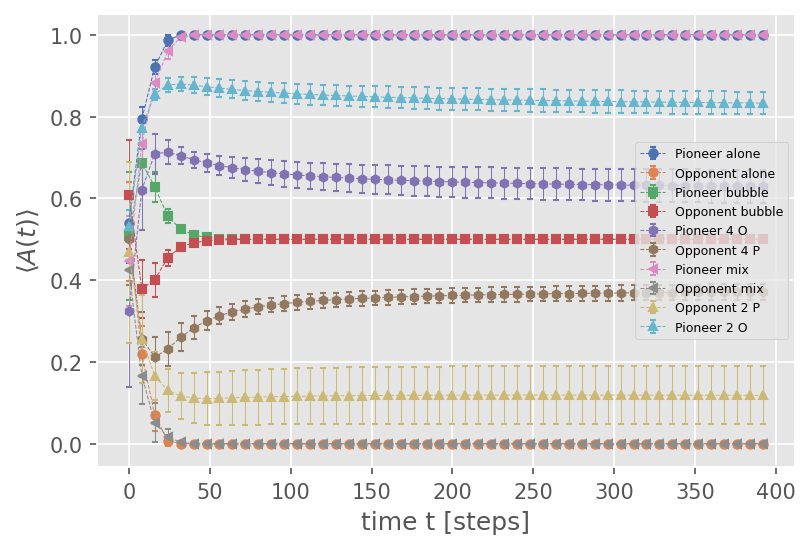

In [28]:
import itertools

sns.set_palette('deep')
cmap = sns.color_palette()

step=2
stop=100
plt.figure()
# plot
palette = itertools.cycle(cmap)
markers = ('o', 's', '^', '*', 'h', '<', '>')
for marker, (key, postState) in zip(markers, mixed_data.items()):
    plt.errorbar(postState.p_alone.t[:stop:step], postState.p_alone.mean[:stop:step], \
                 yerr=postState.p_alone.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='o', ms=4, label=f"Pioneer alone", color=next(palette))
    plt.errorbar(postState.o_alone.t[:stop:step], postState.o_alone.mean[:stop:step], \
                 yerr=postState.o_alone.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='o', ms=4, label=f"Opponent alone", color=next(palette))
    plt.errorbar(postState.p_bubble.t[:stop:step], postState.p_bubble.mean[:stop:step], \
                 yerr=postState.p_bubble.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='s', ms=4, label=f"Pioneer bubble", color=next(palette))
    plt.errorbar(postState.o_bubble.t[:stop:step], postState.o_bubble.mean[:stop:step], \
                 yerr=postState.o_bubble.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='s', ms=4, label=f"Opponent bubble", color=next(palette))
    plt.errorbar(postState.p_light.t[:stop:step], postState.p_light.mean[:stop:step], \
                 yerr=postState.p_light.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='h', ms=4, label=f"Pioneer 4 O", color=next(palette))
    plt.errorbar(postState.o_light.t[:stop:step], postState.o_light.mean[:stop:step], \
                 yerr=postState.o_light.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='h', ms=4, label=f"Opponent 4 P", color=next(palette))
    plt.errorbar(postState.p_mix.t[:stop:step], postState.p_mix.mean[:stop:step], \
                 yerr=postState.p_mix.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='<', ms=4, label=f"Pioneer mix", color=next(palette))
    plt.errorbar(postState.o_mix.t[:stop:step], postState.o_mix.mean[:stop:step], \
                 yerr=postState.o_mix.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='<', ms=4, label=f"Opponent mix", color=next(palette))
    plt.errorbar(postState.o_light2.t[:stop:step], postState.o_light2.mean[:stop:step], \
                 yerr=postState.o_light2.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='^', ms=4, label=f"Opponent 2 P", color=next(palette))
    plt.errorbar(postState.p_light2.t[:stop:step], postState.p_light2.mean[:stop:step], \
                 yerr=postState.p_light2.std[:stop:step], \
                 linestyle="--", linewidth="0.5", capsize=1.5, elinewidth=0.5,\
                 marker='^', ms=4, label=f"Pioneer 2 O", color=next(palette))
    
plt.legend(fontsize=6, loc='right')
plt.xlabel('time t [steps]')
plt.ylabel(r'$\langle A(t) \rangle$')

plt.show()

In [26]:
def CheckNeighbours(data, _id, key):
    delta = 0.01
    avantgarde = data.query("step == 0").at[_id, "avantgarde"]
    idVal = data.query("step == 0").at[_id, "id"]
    neighbourAvantgarde = neighbours(data, idVal).query("step == 0").get("avantgarde")
    
    if key == 'alone':
        return np.all(neighbourAvantgarde == 0.0)
    
    elif key == 'bubble':
        minRequiredNeighbours = 6
        return np.count_nonzero(neighbourAvantgarde == -1.0 * avantgarde - delta) >= minRequiredNeighbours
    
    elif key == 'light2':
        minRequiredNeighbours = 2
        maxRequiredNeighbours = 2
        return (np.count_nonzero(neighbourAvantgarde == -1.0 * avantgarde - delta) == minRequiredNeighbours and \
                np.count_nonzero(neighbourAvantgarde == 0.0) >= 5)
    
    elif key == 'light':
        minRequiredNeighbours = 3
        maxRequiredNeighbours = 5
        return (np.count_nonzero(neighbourAvantgarde == -1.0 * avantgarde - delta) >= minRequiredNeighbours and \
                np.count_nonzero(neighbourAvantgarde == -1.0 * avantgarde - delta) <= maxRequiredNeighbours and \
                np.count_nonzero(neighbourAvantgarde == 0.0) >= minRequiredNeighbours)
    
    elif key == 'mix':
        minRequiredNeighbours = 3
        #print(neighbourAvantgarde)
        return (np.count_nonzero(neighbourAvantgarde == avantgarde - delta) >= minRequiredNeighbours and \
                np.count_nonzero(neighbourAvantgarde == -1.0 * avantgarde - delta) >= minRequiredNeighbours)
        
    return False


data = load_data(os.path.join("../data/po100k", "data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_seed_100.csv"))
pioneer_ids = GetIds(data, "avantgarde == -0.5")
true_ids = []
for _id in pioneer_ids.index:
    if CheckNeighbours(data, _id, 'mix'):
        true_ids.append(data.query("step == 0").at[_id, "id"])
    
data.query("id in @true_ids").query("step == 0")

,step,id,affinity,avantgarde
420,0,421,0.135391,-0.5
2541,0,2542,0.090005,-0.5
3865,0,3866,0.009040,-0.5
6217,0,6218,0.173007,-0.5
7070,0,7071,0.019656,-0.5
